In [1]:
# downloaded from https://data.nist.gov/od/id/mds2-2499

import pickle

In [2]:
def bed2length_all(file_ad):
    bed_all = []
    with open(file_ad,'r') as file:
        for line in file:
            line_split=line.strip().split("\t")
            # ['Y', '59033775', '59034050']
            #chrom,start,end=line_split
            bed_all.append(line_split)
    chrom_list= []
    length_all ={}
    for rec in bed_all[1:]:
        chrom,start,end  = rec[:3]
        if chrom in length_all:
            length_all[chrom] += int(end)-int(start)
        else:
            length_all[chrom] = int(end)-int(start)    
    return length_all

In [3]:
folder = "/Volumes/work/FritzLab/GIAB_project/"


In [4]:
file_ad=folder+"nistzip_GRCh37/mappability/GRCh37_lowmappabilityall.bed"

length_all_37= bed2length_all(file_ad)

In [5]:
file_ad=folder+"nistzip_GRCh38/mappability/GRCh38_lowmappabilityall.bed"

length_all_38= bed2length_all(file_ad)
len(length_all_38)

24

In [6]:
length_all_37.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X', 'Y'])

In [7]:
file_ad="/Volumes/work/FritzLab/GIAB_project/nist-grex/S1-mappability/data/chm13_lowmappabilityall.bed"

length_all_t2t= bed2length_all(file_ad)
len(length_all_t2t)

25

In [8]:
length_all_t2t["chr9"],length_all_38["chr9"]

(44804938, 16650461)

In [9]:
length_all_t2t.keys()

dict_keys(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM'])

In [10]:
chroms= list(range(1,23))+["X","Y"]
length_all_37_list = []
length_all_38_list = []
length_all_t2t_list = []
for chrom in chroms:
    length_all_37_list.append(length_all_37[str(chrom)])
    length_all_38_list.append(length_all_38["chr"+str(chrom)])
    length_all_t2t_list.append(length_all_t2t["chr"+str(chrom)])

    
len(length_all_37_list), len(chroms[:22]+[23,24])#, chroms[:22]+[23,24]

(24, 24)

In [ ]:

with open(folder+'reference_genome_len.pickle', 'rb') as handle:
    values = pickle.load(handle)
(nonN_all_t2t,nonN_all_37,nonN_all_38, chroms) = values

In [163]:

ratio_37= [100*length_all_37_list[i]/nonN_all_37[i] for i in range(24)]
ratio_38= [100*length_all_38_list[i]/nonN_all_38[i] for i in range(24)]
ratio_t2t= [100*length_all_t2t_list[i]/nonN_all_t2t[i] for i in range(24)]


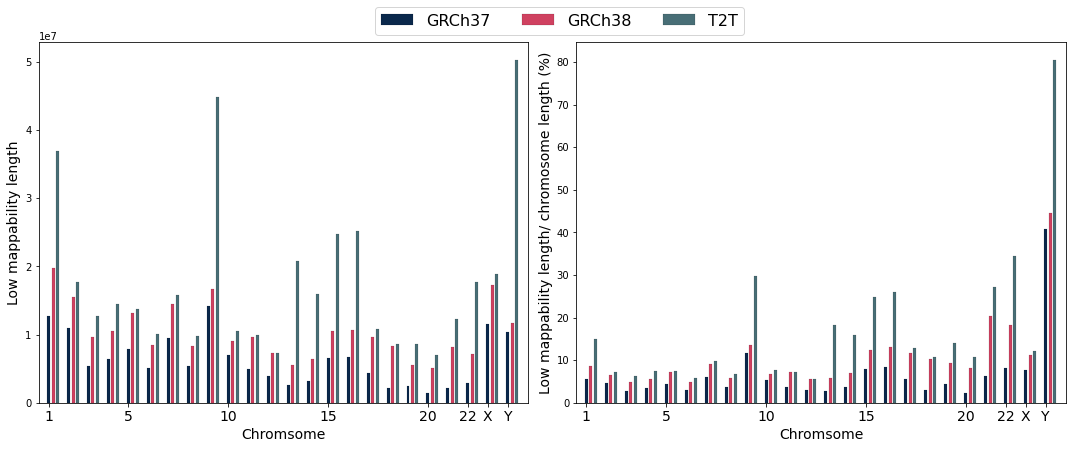

In [180]:
import numpy as np
import matplotlib.pyplot as plt
#fig = plt.figure()

fig, axs = plt.subplots(ncols=2,nrows=1)
fig.set_figheight(6)
fig.set_figwidth(15)
# ind = np.arange(0,12,2)

#fig.suptitle('Vertically stacked subplots')
axs[0].bar([2*i+0 for i in list(range(1,25))], length_all_37_list,                  color = '#0A284B', width = 0.3, edgecolor = "black", linewidth=0.1)
axs[0].bar([2*i+0.45 for i in list(range(1,25))], length_all_38_list, color = '#CF4160', width = 0.3, edgecolor = "black", linewidth=0.1)
axs[0].bar([2*i+0.9 for i in list(range(1,25))], length_all_t2t_list, color = '#486E76', width = 0.3, edgecolor = "black", linewidth=0.1)


axs[0].set_xticks([i*2 for i in  [1,5,10,15,20,22,23,24]])
axs[0].set_xticklabels( [1,5,10,15,20,22,"X","Y"], fontsize=14)
axs[0].set_xlabel("Chromsome", fontsize=14)
axs[0].set_ylabel("Low mappability length", fontsize=14)
axs[0].set_xlim([2*i for i in [0.5,25]])


axs[1].bar([2*i+0 for i in list(range(1,25))], ratio_37,                  color = '#0A284B', width = 0.3, edgecolor = "black", linewidth=0.1)
axs[1].bar([2*i+0.45 for i in list(range(1,25))], ratio_38, color = '#CF4160', width = 0.3, edgecolor = "black", linewidth=0.1)
axs[1].bar([2*i+0.9 for i in list(range(1,25))], ratio_t2t, color = '#486E76', width = 0.3, edgecolor = "black", linewidth=0.1)

axs[1].set_xticks([i*2 for i in  [1,5,10,15,20,22,23,24]])
axs[1].set_xticklabels( [1,5,10,15,20,22,"X","Y"], fontsize=14)
axs[1].set_xlabel("Chromsome", fontsize=14)
axs[1].set_ylabel("Low mappability length/ chromosome length (%)", fontsize=14)
axs[1].set_xlim([2*i for i in [0.5,25]])



#ax = fig.add_axes([0,0,1,1])

# '#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#e41a1c',  '#a65628'
#ax.bar(chroms[:22]+[23,24], length_all_37_list, color = '#ece7f2', width = 0.25, label="GRCh37", edgecolor = "grey")
#axs[0].bar([i+0.25 for i in chroms[:22]+[23,24]], length_all_38_list, color = '#a6bddb', width = 0.25, label="GRCh38", edgecolor = "grey")
#axs[0].bar([i+0.5 for i in chroms[:22]+[23,24]], length_all_t2t_list, color = '#2b8cbe', width = 0.25, label="T2T-chm13", edgecolor = "grey")

# axs[0]..legend()
fig.legend(["GRCh37","GRCh38","T2T"], loc='upper right', bbox_to_anchor=(0.7,1.05), ncol=3, fontsize=16)# , bbox_transform=fig.transFigure , bbox_to_anchor=(1,-0.1),
fig.tight_layout() 

# #ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)

plt.savefig("fig_output/low_mapp_v4_.tiff", bbox_inches='tight')


## CDS

In [176]:
file_ad= folder+ "nistzip_GRCh37/FunctionalRegions/GRCh37_refseq_cds.bed"
cds_length_37= bed2length_all(file_ad)

file_ad= folder+ "nistzip_GRCh38/FunctionalRegions/GRCh38_refseq_cds.bed"
cds_length_38= bed2length_all(file_ad)


file_ad= "/Volumes/work/FritzLab/GIAB_project/nist-grex/S3-gene-coding/data/T2T-CHM13v2.0_refseq_cds_merged.bed"
cds_length_t2t= bed2length_all(file_ad)


chroms= list(range(1,23))+["X","Y"]
cds_length_37_list = []
cds_length_38_list = []
cds_length_t2t_list = []
for chrom in chroms:
    cds_length_37_list.append(cds_length_37[str(chrom)])
    cds_length_38_list.append(cds_length_38["chr"+str(chrom)])
    cds_length_t2t_list.append(cds_length_t2t[str(chrom)])

    
len(cds_length_37_list), len(chroms[:22]+[23,24])#, chroms[:22]+[23,24]


cds_ratio_37=  [100* cds_length_37_list[i]/nonN_all_37[i]   for i in range(24)]
cds_ratio_38=  [100* cds_length_38_list[i]/nonN_all_38[i]   for i in range(24)]
cds_ratio_t2t= [100* cds_length_t2t_list[i]/nonN_all_t2t[i] for i in range(24)]


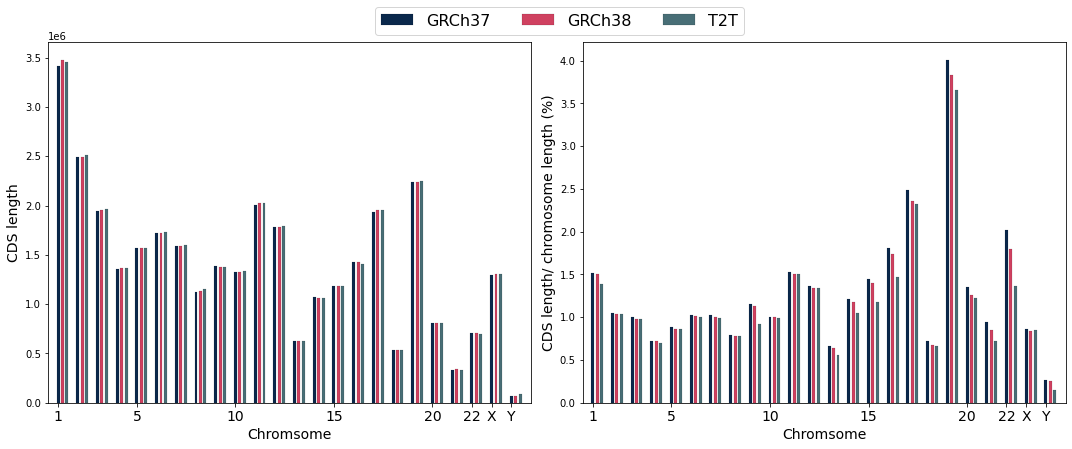

In [189]:
import numpy as np
import matplotlib.pyplot as plt
#fig = plt.figure()

fig, axs = plt.subplots(ncols=2,nrows=1)
fig.set_figheight(6)
fig.set_figwidth(15)
# ind = np.arange(0,12,2)

#fig.suptitle('Vertically stacked subplots')
axs[0].bar([2*i+0 for i in list(range(1,25))],   cds_length_37_list,                  color = '#0A284B', width = 0.3, edgecolor = "black", linewidth=0.1)
axs[0].bar([2*i+0.45 for i in list(range(1,25))],cds_length_38_list, color = '#CF4160', width = 0.3, edgecolor = "black", linewidth=0.1)
axs[0].bar([2*i+0.9 for i in list(range(1,25))], cds_length_t2t_list, color = '#486E76', width = 0.3, edgecolor = "black", linewidth=0.1)


axs[0].set_xticks([i*2 for i in  [1,5,10,15,20,22,23,24]])
axs[0].set_xticklabels( [1,5,10,15,20,22,"X","Y"], fontsize=14)
axs[0].set_xlabel("Chromsome", fontsize=14)
axs[0].set_ylabel("CDS length", fontsize=14)
axs[0].set_xlim([2*i for i in [0.5,25]])


axs[1].bar([2*i+0 for i in list(range(1,25))],   cds_ratio_37,                  color = '#0A284B', width = 0.3, edgecolor = "black", linewidth=0.1)
axs[1].bar([2*i+0.45 for i in list(range(1,25))],cds_ratio_38, color = '#CF4160', width = 0.3, edgecolor = "black", linewidth=0.1)
axs[1].bar([2*i+0.9 for i in list(range(1,25))], cds_ratio_t2t, color = '#486E76', width = 0.3, edgecolor = "black", linewidth=0.1)

axs[1].set_xticks([i*2 for i in  [1,5,10,15,20,22,23,24]])
axs[1].set_xticklabels( [1,5,10,15,20,22,"X","Y"], fontsize=14)
axs[1].set_xlabel("Chromsome", fontsize=14)
axs[1].set_ylabel("CDS length/ chromosome length (%)", fontsize=14)
axs[1].set_xlim([2*i for i in [0.5,25]])



#ax = fig.add_axes([0,0,1,1])

# '#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#e41a1c',  '#a65628'
#ax.bar(chroms[:22]+[23,24], length_all_37_list, color = '#ece7f2', width = 0.25, label="GRCh37", edgecolor = "grey")
#axs[0].bar([i+0.25 for i in chroms[:22]+[23,24]], length_all_38_list, color = '#a6bddb', width = 0.25, label="GRCh38", edgecolor = "grey")
#axs[0].bar([i+0.5 for i in chroms[:22]+[23,24]], length_all_t2t_list, color = '#2b8cbe', width = 0.25, label="T2T-chm13", edgecolor = "grey")

# axs[0]..legend()
fig.legend(["GRCh37","GRCh38","T2T"], loc='upper right', bbox_to_anchor=(0.7,1.05), ncol=3, fontsize=16)# , bbox_transform=fig.transFigure , bbox_to_anchor=(1,-0.1),
fig.tight_layout() 

# #ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)

plt.savefig("fig_output/cds_v4_.tiff", bbox_inches='tight')


In [199]:
len([2*i+0 for i in list(range(1,25))]),len(cds_length_37_list)

(24, 24)

## GC 

In [209]:
file_ad= "/Volumes/work/FritzLab/GIAB_project/gc_out/CHM13_l100_gc85_slop50.bed"
gc= bed2length_all(file_ad)
file_ad= "/Volumes/work/FritzLab/GIAB_project/nistzip_GRCh37/GCcontent/GRCh37_gc85_slop50.bed"
gc_37= bed2length_all(file_ad)
file_ad= "/Volumes/work/FritzLab/GIAB_project/nistzip_GRCh38/GCcontent/GRCh38_gc85_slop50.bed"
gc_38= bed2length_all(file_ad)

chroms= list(range(1,23))+["X"] # ,"Y"]
gc_t2t_list = []
gc_37_list = []
gc_38_list = []

for chrom in chroms:
    gc_t2t_list.append(gc["chr"+str(chrom)])
    gc_37_list.append(gc_37[str(chrom)])
    gc_38_list.append(gc_38["chr"+str(chrom)])

    


gc_ratio_37=  [100* gc_37_list[i]/nonN_all_37[i]   for i in range(23)] # no chr Y
gc_ratio_38=  [100* gc_38_list[i]/nonN_all_38[i]   for i in range(23)] # no chr Y
gc_ratio_t2t = [100* gc_t2t_list[i]/nonN_all_t2t[i] for i in range(23)] # no chr Y
len(gc_38_list)


23

In [210]:


file_ad= "/Volumes/work/FritzLab/GIAB_project/gc_out/CHM13_l100_gc20to25_slop50.bed"
gc= bed2length_all(file_ad)
file_ad= "/Volumes/work/FritzLab/GIAB_project/nistzip_GRCh37/GCcontent/GRCh37_gc20to25_slop50.bed"
gc_37= bed2length_all(file_ad)
file_ad= "/Volumes/work/FritzLab/GIAB_project/nistzip_GRCh38/GCcontent/GRCh38_gc20to25_slop50.bed"
gc_38= bed2length_all(file_ad)

chroms= list(range(1,23))+["X"] # ,"Y"]
gc_t2t_list_2 = []
gc_37_list_2 = []
gc_38_list_2 = []

for chrom in chroms:
    gc_t2t_list_2.append(gc["chr"+str(chrom)])
    gc_37_list_2.append(gc_37[str(chrom)])
    gc_38_list_2.append(gc_38["chr"+str(chrom)])

    



gc_ratio_37_2=  [100* gc_37_list_2[i]/nonN_all_37[i]   for i in range(23)] # no chr Y
gc_ratio_38_2=  [100* gc_38_list_2[i]/nonN_all_38[i]   for i in range(23)] # no chr Y
gc_ratio_t2t_2=  [100* gc_t2t_list_2[i]/nonN_all_t2t[i] for i in range(23)] # no chr Y
len(gc_38_list_2)

23

In [201]:
len(cds_length_37_list)

24

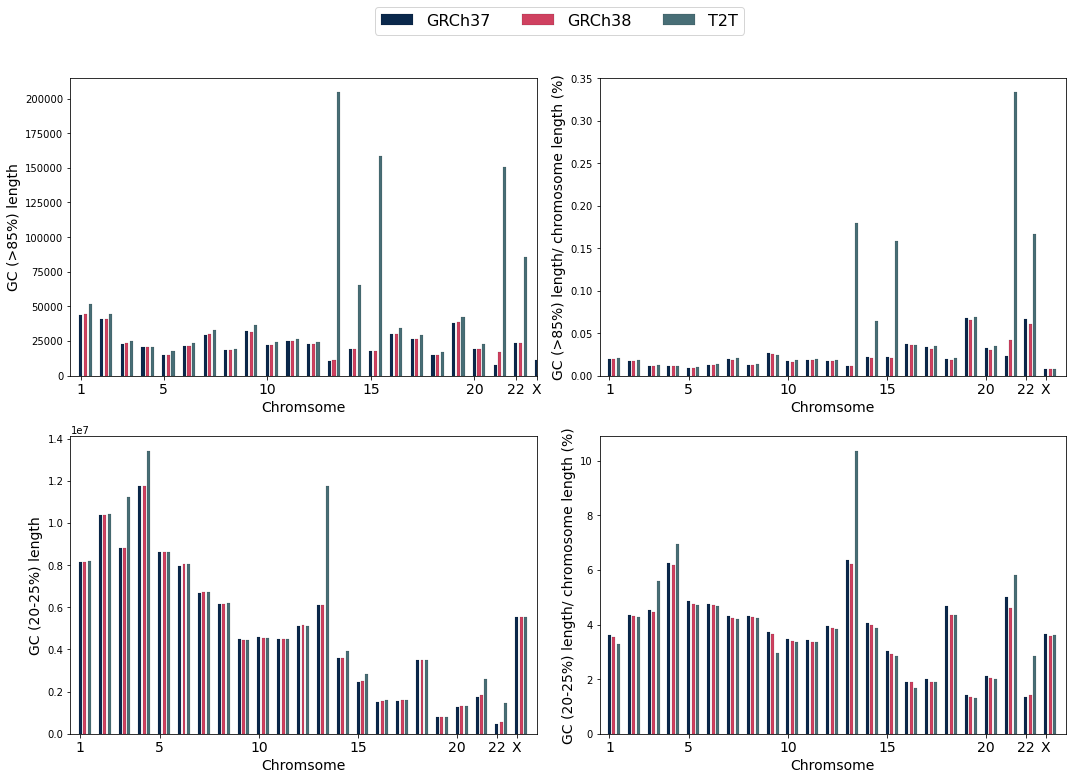

In [224]:
import numpy as np
import matplotlib.pyplot as plt
#fig = plt.figure()

fig, axs = plt.subplots(ncols=2,nrows=2)
fig.set_figheight(10)
fig.set_figwidth(15)
# ind = np.arange(0,12,2)

#fig.suptitle('Vertically stacked subplots')
axs[0,0].bar([2*i+0 for i in list(range(1,24))],   gc_37_list,                  color = '#0A284B', width = 0.3, edgecolor = "black", linewidth=0.1)
axs[0,0].bar([2*i+0.45 for i in list(range(1,24))],gc_38_list, color = '#CF4160', width = 0.3, edgecolor = "black", linewidth=0.1)
axs[0,0].bar([2*i+0.9 for i in list(range(1,24))], gc_t2t_list, color = '#486E76', width = 0.3, edgecolor = "black", linewidth=0.1)

axs[0,0].set_xticks([i*2 for i in  [1,5,10,15,20,22,23]])
axs[0,0].set_xticklabels( [1,5,10,15,20,22,"X"], fontsize=14)
axs[0,0].set_xlabel("Chromsome", fontsize=14)
axs[0,0].set_ylabel("GC (>85%) length", fontsize=14)
axs[0,0].set_xlim([2*i for i in [0.5,23]])

axs[0,1].bar([2*i+0 for i in list(range(1,24))],   gc_ratio_37,                  color = '#0A284B', width = 0.3, edgecolor = "black", linewidth=0.1)
axs[0,1].bar([2*i+0.45 for i in list(range(1,24))],gc_ratio_38, color = '#CF4160', width = 0.3, edgecolor = "black", linewidth=0.1)
axs[0,1].bar([2*i+0.9 for i in list(range(1,24))], gc_ratio_t2t, color = '#486E76', width = 0.3, edgecolor = "black", linewidth=0.1)

axs[0,1].set_xticks([i*2 for i in  [1,5,10,15,20,22,23]])
axs[0,1].set_xticklabels( [1,5,10,15,20,22,"X"], fontsize=14)
axs[0,1].set_xlabel("Chromsome", fontsize=14)
axs[0,1].set_ylabel("GC (>85%) length/ chromosome length (%)", fontsize=14)
axs[0,1].set_xlim([2*i for i in [0.5,24]])




#fig.suptitle('Vertically stacked subplots')
axs[1,0].bar([2*i+0 for i in list(range(1,24))],   gc_37_list_2,                  color = '#0A284B', width = 0.3, edgecolor = "black", linewidth=0.1)
axs[1,0].bar([2*i+0.45 for i in list(range(1,24))],gc_38_list_2, color = '#CF4160', width = 0.3, edgecolor = "black", linewidth=0.1)
axs[1,0].bar([2*i+0.9 for i in list(range(1,24))], gc_t2t_list_2, color = '#486E76', width = 0.3, edgecolor = "black", linewidth=0.1)

axs[1,0].set_xticks([i*2 for i in  [1,5,10,15,20,22,23]])
axs[1,0].set_xticklabels( [1,5,10,15,20,22,"X"], fontsize=14)
axs[1,0].set_xlabel("Chromsome", fontsize=14)
axs[1,0].set_ylabel("GC (20-25%) length", fontsize=14)
axs[1,0].set_xlim([2*i for i in [0.5,24]])

axs[1,1].bar([2*i+0 for i in list(range(1,24))],   gc_ratio_37_2,                  color = '#0A284B', width = 0.3, edgecolor = "black", linewidth=0.1)
axs[1,1].bar([2*i+0.45 for i in list(range(1,24))],gc_ratio_38_2, color = '#CF4160', width = 0.3, edgecolor = "black", linewidth=0.1)
axs[1,1].bar([2*i+0.9 for i in list(range(1,24))], gc_ratio_t2t_2, color = '#486E76', width = 0.3, edgecolor = "black", linewidth=0.1)

axs[1,1].set_xticks([i*2 for i in  [1,5,10,15,20,22,23]])
axs[1,1].set_xticklabels( [1,5,10,15,20,22,"X"], fontsize=14)
axs[1,1].set_xlabel("Chromsome", fontsize=14)
axs[1,1].set_ylabel("GC (20-25%) length/ chromosome length (%)", fontsize=14)
axs[1,1].set_xlim([2*i for i in [0.5,24]])



# #ax = fig.add_axes([0,0,1,1])
# '#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#e41a1c',  '#a65628'
#ax.bar(chroms[:22]+[23,24], length_all_37_list, color = '#ece7f2', width = 0.25, label="GRCh37", edgecolor = "grey")
#axs[0].bar([i+0.25 for i in chroms[:22]+[23,24]], length_all_38_list, color = '#a6bddb', width = 0.25, label="GRCh38", edgecolor = "grey")
#axs[0].bar([i+0.5 for i in chroms[:22]+[23,24]], length_all_t2t_list, color = '#2b8cbe', width = 0.25, label="T2T-chm13", edgecolor = "grey")

# axs[0]..legend()
fig.legend(["GRCh37","GRCh38","T2T"], loc='upper right', bbox_to_anchor=(0.7,1.09), ncol=3, fontsize=16)# , bbox_transform=fig.transFigure , bbox_to_anchor=(1,-0.1),
fig.tight_layout() 

#ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
plt.savefig("fig_output/gc_v4_.tiff", bbox_inches='tight')


## genomic distance

s7-sina_hackaton_v1_b

# reference genome length

In [13]:
from Bio import SeqIO
folder = "/Volumes/work/FritzLab/GIAB_project/"

records_37 = list(SeqIO.parse(folder+"hg37.fa", "fasta"))
records_37[0].id

'chr1'

In [30]:
from Bio import SeqIO

records_37 = list(SeqIO.parse(folder+"chm13v2.0_chr13.fa", "fasta"))
records_37[0].id

from collections import Counter

for chrom in ["chr13"]:
    for i in range(len(records_37)):
        if records_37[i].id == chrom:
            print(chrom)
            rec= records_37[i].seq
            break

collection = Counter(rec)

chr13


In [32]:
# add 50bp on each side to get "200bp regions in which middle 100bp contains >x% GC
collection

Counter({'c': 13425883,
         't': 21949057,
         'a': 22344027,
         'g': 12633131,
         'A': 12820642,
         'C': 8741090,
         'G': 8719223,
         'T': 12933633})

In [31]:
collection["a"]+collection["t"]+collection["c"]+collection["g"]+collection["A"]+collection["T"]+collection["C"]+collection["G"]


113566686

In [27]:
collection

Counter({'N': 16381200,
         'A': 15663586,
         'G': 9198250,
         'c': 9638494,
         'a': 14384025,
         't': 14444564,
         'g': 9735355,
         'C': 9200698,
         'T': 15718153,
         'n': 3})

In [ ]:
nonN_all_37=[]
chrom_all_37=[]

chroms= ["chr"+str(i) for i in range(1,23)]+["chrX","chrY"]
for chrom in chroms:
    for i in range(len(records_37)):
        if records_37[i].id == chrom:
            print(chrom)
            rec= records_37[i].seq
            collection = Counter(rec)
            nonN=collection["a"]+collection["t"]+collection["c"]+collection["g"]+collection["A"]+collection["T"]+collection["C"]+collection["G"]
            nonN_all_37.append(nonN)
            break            



In [27]:

from collections import Counter


In [28]:
nonN_all_37=[]
chrom_all_37=[]

chroms= ["chr"+str(i) for i in range(1,23)]+["chrX","chrY"]
for chrom in chroms:
    for i in range(len(records_37)):
        if records_37[i].id == chrom:
            print(chrom)
            rec= records_37[i].seq
            collection = Counter(rec)
            nonN=collection["a"]+collection["t"]+collection["c"]+collection["g"]+collection["A"]+collection["T"]+collection["C"]+collection["G"]
            nonN_all_37.append(nonN)
            break            



chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr20
chr21
chr22
chrX
chrY


In [29]:
from Bio import SeqIO
folder = "/Volumes/work/FritzLab/GIAB_project/"
records_38 = list(SeqIO.parse(folder+"hg38.fa", "fasta"))

In [30]:
nonN_all_38=[]
chrom_all_38=[]

chroms= ["chr"+str(i) for i in range(1,23)]+["chrX","chrY"]
for chrom in chroms:
    for i in range(len(records_38)):
        if records_38[i].id == chrom:
            print(chrom)
            rec= records_38[i].seq
            collection = Counter(rec)
            nonN=collection["a"]+collection["t"]+collection["c"]+collection["g"]+collection["A"]+collection["T"]+collection["C"]+collection["G"]
            nonN_all_38.append(nonN)
            break


chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr20
chr21
chr22
chrX
chrY


In [31]:
from Bio import SeqIO
folder = "/Volumes/work/FritzLab/GIAB_project/"
records_t2t = list(SeqIO.parse(folder+"chm13v2.0.fa", "fasta"))


In [32]:
nonN_all_t2t=[]
chroms= ["chr"+str(i) for i in range(1,23)]+["chrX","chrY"]
for chrom in chroms:
    for i in range(len(records_t2t)):
        if records_t2t[i].id == chrom:
            print(chrom)
            rec= records_t2t[i].seq
            collection = Counter(rec)
            nonN=collection["a"]+collection["t"]+collection["c"]+collection["g"]+collection["A"]+collection["T"]+collection["C"]+collection["G"]
            nonN_all_t2t.append(nonN)
            break
            



chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr20
chr21
chr22
chrX
chrY


In [ ]:
a=3
a

In [33]:
print(len(nonN_all_t2t),len(nonN_all_37),len(nonN_all_38), chroms ) 
nonN_all_t2t[:2],nonN_all_37[:2],nonN_all_38[:2]



24 24 24 ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY']


([248387328, 242696752], [225280621, 238204518], [230481012, 240548228])

In [4]:
values=(nonN_all_t2t,nonN_all_37,nonN_all_38, chroms) 

import pickle

with open(folder+'reference_genome_len.pickle', 'wb') as handle:
    pickle.dump(values, handle, protocol=pickle.HIGHEST_PROTOCOL)



NameError: name 'nonN_all_t2t' is not defined

In [20]:

with open(folder+'reference_genome_len.pickle', 'rb') as handle:
    values = pickle.load(handle)
(nonN_all_t2t,nonN_all_37,nonN_all_38, chroms) = values

In [36]:

ratio_37= [length_all_37_list[i]/nonN_all_37[i] for i in range(24)]
ratio_38= [length_all_38_list[i]/nonN_all_38[i] for i in range(24)]
ratio_t2t= [length_all_t2t_list[i]/nonN_all_t2t[i] for i in range(24)]


NameError: name 'length_all_37_list' is not defined

In [110]:
nonN_all_38[:3],nonN_all_37[:3]

([230481012, 240548228, 198100135], [225280621, 238204518, 194797135])

In [112]:
ratio_37[:3],ratio_38[:3]

([0.05649247122769606, 0.04625565918107397, 0.027924553407831176],
 [0.08570215319950088, 0.06474119194093585, 0.048931460849332586])

In [113]:
length_all_37_list[:2],length_all_38_list[:2]

([12726659, 11018307], [19752719, 15573379])

# old

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(chroms[:22]+[23,24], length_all_37_list, color = 'b', width = 0.25, label="GRCh37")
ax.bar([i+0.25 for i in chroms[:22]+[23,24]], length_all_38_list, color = 'r', width = 0.25, label="GRCh38")
plt.legend()
#plt.xticks([chroms[:22]+[23,24]])
ax.set_xticks([1,5,10,15,20,22,23,24])
ax.set_xticklabels([1,5,10,15,20,22,"X","Y"])
#ax.set_xticklabels(x)
plt.xlim([0.5,24.5])
plt.ylabel("Length of low mappability regions")
plt.xlabel("Chromsome")
#ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
plt.savefig("low_mapp.pdf", bbox_inches='tight')


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

# ax.bar(chroms[:22]+[23,24], length_all_37_list, color = 'b', width = 0.25, label="GRCh37")
# ax.bar([i+0.25 for i in chroms[:22]+[23,24]], length_all_38_list, color = 'r', width = 0.25, label="GRCh38")
# ax.bar([i+0.5 for i in chroms[:22]+[23,24]], length_all_t2t_list, color = 'g', width = 0.25, label="T2T-chm13")

# plt.legend()
# #plt.xticks([chroms[:22]+[23,24]])
# ax.set_xticks([1,5,10,15,20,22,23,24])
# ax.set_xticklabels([1,5,10,15,20,22,"X","Y"])
# #ax.set_xticklabels(x)
# plt.xlim([0.5,24.5])
# plt.ylabel("Length of low mappability regions")
# plt.xlabel("Chromsome")
# #ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
# plt.savefig("low_mapp3.pdf", bbox_inches='tight')


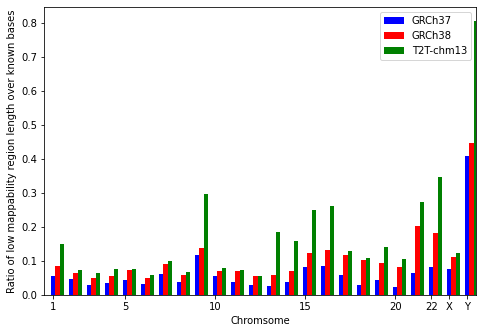

In [139]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


ax.bar(range(1,25), ratio_37, color = 'b', width = 0.25, label="GRCh37")
ax.bar([i+0.25 for i in range(1,25)], ratio_38, color = 'r', width = 0.25, label="GRCh38")
ax.bar([i+0.5 for i in range(1,25)], ratio_t2t, color = 'g', width = 0.25, label="T2T-chm13")


plt.legend()
#plt.xticks([chroms[:22]+[23,24]])
ax.set_xticks([1,5,10,15,20,22,23,24])
ax.set_xticklabels([1,5,10,15,20,22,"X","Y"])
#ax.set_xticklabels(x)
plt.xlim([0.5,24.5])
plt.ylabel("Ratio of low mappability region length over known bases")
plt.xlabel("Chromsome")
#ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
plt.savefig("low_mapp_ratio3.pdf", bbox_inches='tight')


## CDS

In [114]:
file_ad= folder+ "nistzip_GRCh37/FunctionalRegions/GRCh37_refseq_cds.bed"
cds_length_37= bed2length_all(file_ad)

file_ad= folder+ "nistzip_GRCh38/FunctionalRegions/GRCh38_refseq_cds.bed"
cds_length_38= bed2length_all(file_ad)


file_ad= "/Volumes/work/FritzLab/GIAB_project/nist-grex/S3-gene-coding/data/T2T-CHM13v2.0_refseq_cds_merged.bed"
cds_length_t2t= bed2length_all(file_ad)


chroms= list(range(1,23))+["X","Y"]
cds_length_37_list = []
cds_length_38_list = []
cds_length_t2t_list = []
for chrom in chroms:
    cds_length_37_list.append(cds_length_37[str(chrom)])
    cds_length_38_list.append(cds_length_38["chr"+str(chrom)])
    cds_length_t2t_list.append(cds_length_t2t[str(chrom)])

    
len(cds_length_37_list), len(chroms[:22]+[23,24])#, chroms[:22]+[23,24]


cds_ratio_37=  [100* cds_length_37_list[i]/nonN_all_37[i]   for i in range(24)]
cds_ratio_38=  [100* cds_length_38_list[i]/nonN_all_38[i]   for i in range(24)]
cds_ratio_t2t= [100* cds_length_t2t_list[i]/nonN_all_t2t[i] for i in range(24)]


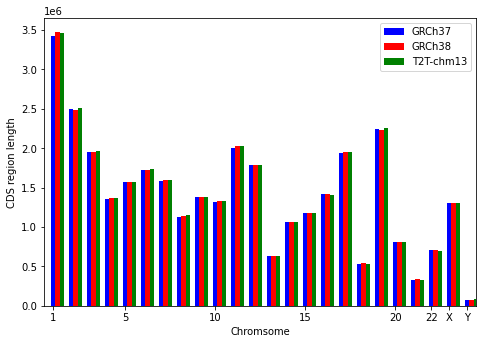

In [146]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


ax.bar(range(1,25),                    cds_length_37_list, color = 'b', width = 0.25, label="GRCh37")

ax.bar([i+0.25 for i in range(1,25)],  cds_length_38_list, color = 'r', width = 0.25, label="GRCh38")
ax.bar([i+ 0.5 for i in range(1,25)],  cds_length_t2t_list, color = 'g', width = 0.25, label="T2T-chm13")


plt.legend()
#plt.xticks([chroms[:22]+[23,24]])
ax.set_xticks([1,5,10,15,20,22,23,24])
ax.set_xticklabels([1,5,10,15,20,22,"X","Y"])

plt.xlim([0.5,24.5])
plt.ylabel("CDS region length")
plt.xlabel("Chromsome")
plt.savefig("cds_1.pdf", bbox_inches='tight')


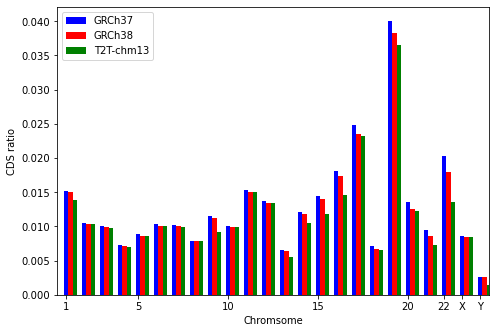

In [147]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


ax.bar(range(1,25),                   cds_ratio_37,  color = 'b', width = 0.25, label="GRCh37")

ax.bar([i+0.25 for i in range(1,25)], cds_ratio_38,  color = 'r', width = 0.25, label="GRCh38")
ax.bar([i+ 0.5 for i in range(1,25)], cds_ratio_t2t, color = 'g', width = 0.25, label="T2T-chm13")


plt.legend()
#plt.xticks([chroms[:22]+[23,24]])
ax.set_xticks([1,5,10,15,20,22,23,24])
ax.set_xticklabels([1,5,10,15,20,22,"X","Y"])

plt.xlim([0.5,24.5])
plt.ylabel("CDS ratio")
plt.xlabel("Chromsome")
plt.savefig("cds_ratio_1.pdf", bbox_inches='tight')


## adotto 

In [2]:
file_ad = "/Volumes/work/FritzLab/GIAB_project/nist-grex/S5-tr-adotto/data/adotto_TRRegions_Annos.bed"

In [6]:
adotto= bed2length_all(file_ad)

In [12]:
chroms= list(range(1,23))+["X","Y"]
adotto_list = []
for chrom in chroms:
    adotto_list.append(adotto["chr"+str(chrom)])

    
len(adotto_list), len(chroms[:22]+[23,24])#, chroms[:22]+[23,24]



(24, 24)

No handles with labels found to put in legend.


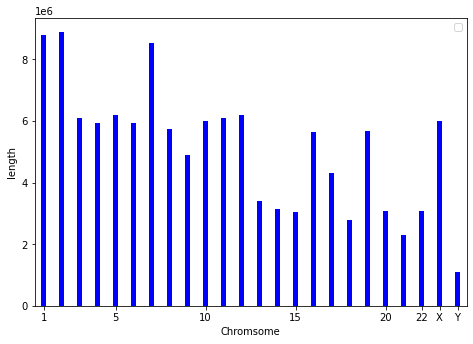

In [14]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


ax.bar(range(1,25), adotto_list,  color = 'b', width = 0.25) # , label="GRCh37"


plt.legend()
#plt.xticks([chroms[:22]+[23,24]])
ax.set_xticks([1,5,10,15,20,22,23,24])
ax.set_xticklabels([1,5,10,15,20,22,"X","Y"])

plt.xlim([0.5,24.5])
plt.ylabel("length")
plt.xlabel("Chromsome")
plt.savefig("adotto_len_1.pdf", bbox_inches='tight')


In [3]:
bed_all = []
with open(file_ad,'r') as file:
    for line in file:
        line_split=line.strip().split("\t")
        # ['Y', '59033775', '59034050']
        #chrom,start,end=line_split
        bed_all.append(line_split)


In [4]:
bed_all[0],bed_all[1]

['chrom',
 'start',
 'end',
 'period',
 'copies',
 'score',
 'entropy',
 'repeat',
 'A',
 'C',
 'G',
 'T',
 'pctmat',
 'pctindel']

In [26]:
entropy_all = [float(i[6]) for i in bed_all[1:]]


In [27]:
len(entropy_all),max(entropy_all),min(entropy_all)

(1581539, 2.0, 0.0)

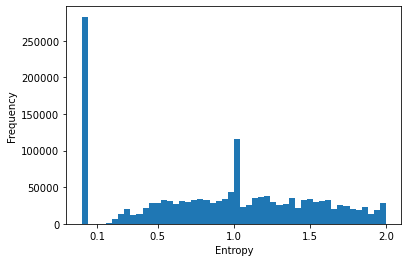

In [28]:
plt.hist(entropy_all,50) # , density=True, facecolor='g', alpha=0.75


plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.xticks([0.1,0.5,1,1.5,2])

#plt.title('Histogram of IQ')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
#plt.grid(True)
#plt.show()
plt.savefig("adotto_hist_1.pdf", bbox_inches='tight')


## GC 

In [14]:
file_ad= "/Volumes/work/FritzLab/GIAB_project/gc_out/CHM13_l100_gc85_slop50.bed"
gc= bed2length_all(file_ad)
file_ad= "/Volumes/work/FritzLab/GIAB_project/nistzip_GRCh37/GCcontent/GRCh37_gc85_slop50.bed"
gc_37= bed2length_all(file_ad)
file_ad= "/Volumes/work/FritzLab/GIAB_project/nistzip_GRCh38/GCcontent/GRCh38_gc85_slop50.bed"
gc_38= bed2length_all(file_ad)

chroms= list(range(1,23))+["X"] # ,"Y"]
gc_t2_list = []
gc_37_list = []
gc_38_list = []

for chrom in chroms:
    gc_t2_list.append(gc["chr"+str(chrom)])
    gc_37_list.append(gc_37[str(chrom)])
    gc_38_list.append(gc_38["chr"+str(chrom)])

    
len(gc_38_list), len(chroms[:22]+[23])#, chroms[:22]+[23,24]



(23, 23)

In [23]:
gc_38_list[12], gc_t2_list[12]

(10959, 204481)

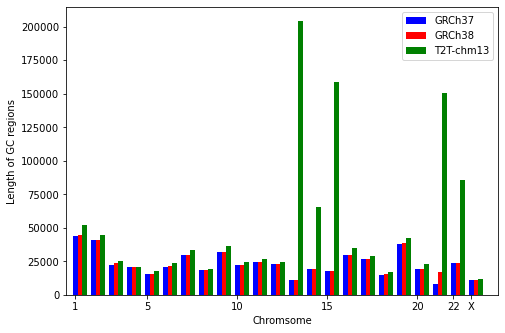

In [40]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


ax.bar(range(1,24),                   gc_37_list,  color = 'b', width = 0.25, label="GRCh37")
ax.bar([i+0.25 for i in range(1,24)], gc_38_list,  color = 'r', width = 0.25, label="GRCh38")
ax.bar([i+ 0.5 for i in range(1,24)], gc_t2_list, color = 'g', width = 0.25, label="T2T-chm13")


plt.legend()
#plt.xticks([chroms[:22]+[23,24]])
ax.set_xticks([1,5,10,15,20,22,23])
ax.set_xticklabels([1,5,10,15,20,22,"X"])

plt.xlim([0.5,24.5])
plt.ylabel("Length of GC regions")
plt.xlabel("Chromsome")
plt.savefig("GC_85_1.pdf", bbox_inches='tight')


In [37]:

gc_ratio_37=  [gc_37_list[i]/nonN_all_37[i]   for i in range(23)] # no chr Y
gc_ratio_38=  [gc_38_list[i]/nonN_all_38[i]   for i in range(23)] # no chr Y
gc_ratio_t2 = [gc_t2_list[i]/nonN_all_t2t[i] for i in range(23)] # no chr Y


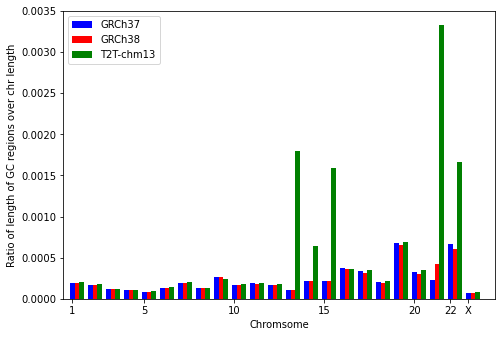

In [39]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


ax.bar(range(1,24),                   gc_ratio_37,  color = 'b', width = 0.25, label="GRCh37")
ax.bar([i+0.25 for i in range(1,24)], gc_ratio_38,  color = 'r', width = 0.25, label="GRCh38")
ax.bar([i+ 0.5 for i in range(1,24)], gc_ratio_t2, color = 'g', width = 0.25, label="T2T-chm13")


plt.legend()
#plt.xticks([chroms[:22]+[23,24]])
ax.set_xticks([1,5,10,15,20,22,23])
ax.set_xticklabels([1,5,10,15,20,22,"X"])

plt.xlim([0.5,24.5])
plt.ylabel("Ratio of length of GC regions over chr length")
plt.xlabel("Chromsome")
plt.savefig("GC_85_ratio_1.pdf", bbox_inches='tight')


In [11]:
file_ad= "/Volumes/work/FritzLab/GIAB_project/gc_out/CHM13_l100_gc20to25_slop50.bed"
gc= bed2length_all(file_ad)


file_ad= "/Volumes/work/FritzLab/GIAB_project/nistzip_GRCh37/GCcontent/GRCh37_gc20to25_slop50.bed"
gc_37= bed2length_all(file_ad)
file_ad= "/Volumes/work/FritzLab/GIAB_project/nistzip_GRCh38/GCcontent/GRCh38_gc20to25_slop50.bed"
gc_38= bed2length_all(file_ad)

In [12]:
chroms= list(range(1,23))+["X"] # ,"Y"]
gc_t2_list = []
gc_37_list = []
gc_38_list = []

for chrom in chroms:
    gc_t2_list.append(gc["chr"+str(chrom)])
    gc_37_list.append(gc_37[str(chrom)])
    gc_38_list.append(gc_38["chr"+str(chrom)])

    
len(gc_t2_list), len(chroms[:22]+[23])#, chroms[:22]+[23,24]



(23, 23)

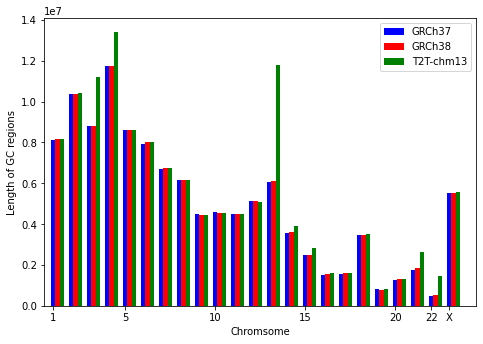

In [14]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


ax.bar(range(1,24),                   gc_37_list,  color = 'b', width = 0.25, label="GRCh37")
ax.bar([i+0.25 for i in range(1,24)], gc_38_list,  color = 'r', width = 0.25, label="GRCh38")
ax.bar([i+ 0.5 for i in range(1,24)], gc_t2_list, color = 'g', width = 0.25, label="T2T-chm13")


plt.legend()
#plt.xticks([chroms[:22]+[23,24]])
ax.set_xticks([1,5,10,15,20,22,23])
ax.set_xticklabels([1,5,10,15,20,22,"X"])

plt.xlim([0.5,24.5])
plt.ylabel("Length of GC regions")
plt.xlabel("Chromsome")
plt.savefig("GC_20_25.pdf", bbox_inches='tight')


In [9]:

with open(folder+'reference_genome_len.pickle', 'rb') as handle:
    values = pickle.load(handle)
(nonN_all_t2t,nonN_all_37,nonN_all_38, chroms) = values


In [10]:
nonN_all_t2t[12], nonN_all_38[12]

(113566686, 97983125)

In [13]:

gc_ratio_37=  [gc_37_list[i]/nonN_all_37[i]   for i in range(23)] # no chr Y
gc_ratio_38=  [gc_38_list[i]/nonN_all_38[i]   for i in range(23)] # no chr Y
gc_ratio_t2 = [gc_t2_list[i]/nonN_all_t2t[i] for i in range(23)] # no chr Y


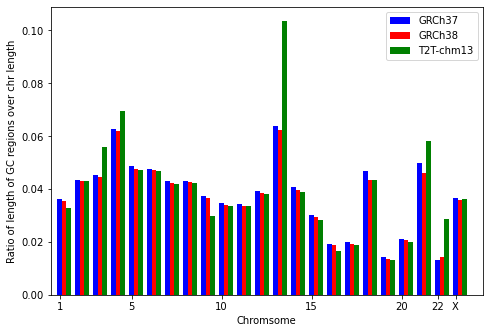

In [17]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


ax.bar(range(1,24),                   gc_ratio_37,  color = 'b', width = 0.25, label="GRCh37")
ax.bar([i+0.25 for i in range(1,24)], gc_ratio_38,  color = 'r', width = 0.25, label="GRCh38")
ax.bar([i+ 0.5 for i in range(1,24)], gc_ratio_t2, color = 'g', width = 0.25, label="T2T-chm13")


plt.legend()
#plt.xticks([chroms[:22]+[23,24]])
ax.set_xticks([1,5,10,15,20,22,23])
ax.set_xticklabels([1,5,10,15,20,22,"X"])

plt.xlim([0.5,24.5])
plt.ylabel("Ratio of length of GC regions over chr length")
plt.xlabel("Chromsome")
plt.savefig("GC_20_25_ratio.pdf", bbox_inches='tight')
